<a href="https://colab.research.google.com/github/kkb0318/benkyokai/blob/main/decision_tree_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### インストール

In [1]:
!apt-get install python-pydot
!pip install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pyparsing
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pyparsing
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 71.7 kB of archives.
After this operation, 347 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Fetched 71.7 kB in 0s (169 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+dfsg1-2_all.deb ...
Unpacking python-pyparsing (2.2.0+dfsg1-2) ...
Selecting previously unselected package python-pydot.
Preparing to unp

### titanic dataset

In [2]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt

# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

The dataset consists of a training set and an evaluation set:

* `dftrain` and `y_train` are the *training set*—the data the model uses to learn.
* The model is tested against the *eval set*, `dfeval`, and `y_eval`.

For training you will use the following features:


<table>
  <tr>
    <th>Feature Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender of passenger</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of passenger</td>
  </tr>
    <tr>
    <td>n_siblings_spouses</td>
    <td>siblings and partners aboard</td>
  </tr>
    <tr>
    <td>parch</td>
    <td>of parents and children aboard</td>
  </tr>
    <tr>
    <td>fare</td>
    <td>Fare passenger paid.</td>
  </tr>
    <tr>
    <td>class</td>
    <td>Passenger's class on ship</td>
  </tr>
    <tr>
    <td>deck</td>
    <td>Which deck passenger was on</td>
  </tr>
    <tr>
    <td>embark_town</td>
    <td>Which town passenger embarked from</td>
  </tr>
    <tr>
    <td>alone</td>
    <td>If passenger was alone</td>
  </tr>
</table>

### 前処理

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [7]:
def make_input_fn(X):
  X = X.dropna()
  X["sex"] = X["sex"].map({"male":0,"female":1})
  X["alone"] = X["alone"].map({"n":0,"y":1})
  X = pd.get_dummies(X, columns=['embark_town'])
  X = pd.get_dummies(X, columns=['class'])
  X = pd.get_dummies(X, columns=['deck'])
  return X

In [8]:
x_train = make_input_fn(dftrain)
x_eval = make_input_fn(dfeval)
# 足りない列を追加
x_eval[x_train.columns.difference(x_eval.columns)]=0

### 学習

In [23]:
clf = DecisionTreeClassifier(
    criterion='gini',   # 評価関数として何を使うか　ジニ係数(gini) or エントロピー(entropy)
    splitter='best', # 条件分岐の基準となる閾値をデータに合わせるか、ランダムで設定するか ("best" or "random")
    max_depth=None, # 木の深さの最大値を指定（過学習抑制のため）
    min_samples_split=20, # 分割対象となるノードの最小サンプル数。min_samples_splitの数に達したノードはそれ以上分割しない
    min_samples_leaf=1, # 葉ノードに含まれる最小サンプル数。この数以下になるノードが存在しないように分割する
    min_weight_fraction_leaf=0, # sample_weightを考慮したうえで、min_samples_leafを判定。
    max_features=None, # 分割時にいくつの特徴量を考慮するか
    random_state=42, # 乱数シード
    max_leaf_nodes=None, # 末端ノードの最大数を指定
    min_impurity_decrease=0.0, # 分割するかどうかを決める不純度低下の閾値(割合)
    min_impurity_split=None, # 非推奨。代わりにmin_impurity_decreaseを使用
    class_weight=None, # ラベルに対して重み付け（不均衡なデータセットの場合に利用）
    ccp_alpha=0.0 # 剪定の重みパラメータ
).fit(x_train, y_train)

## Visualization

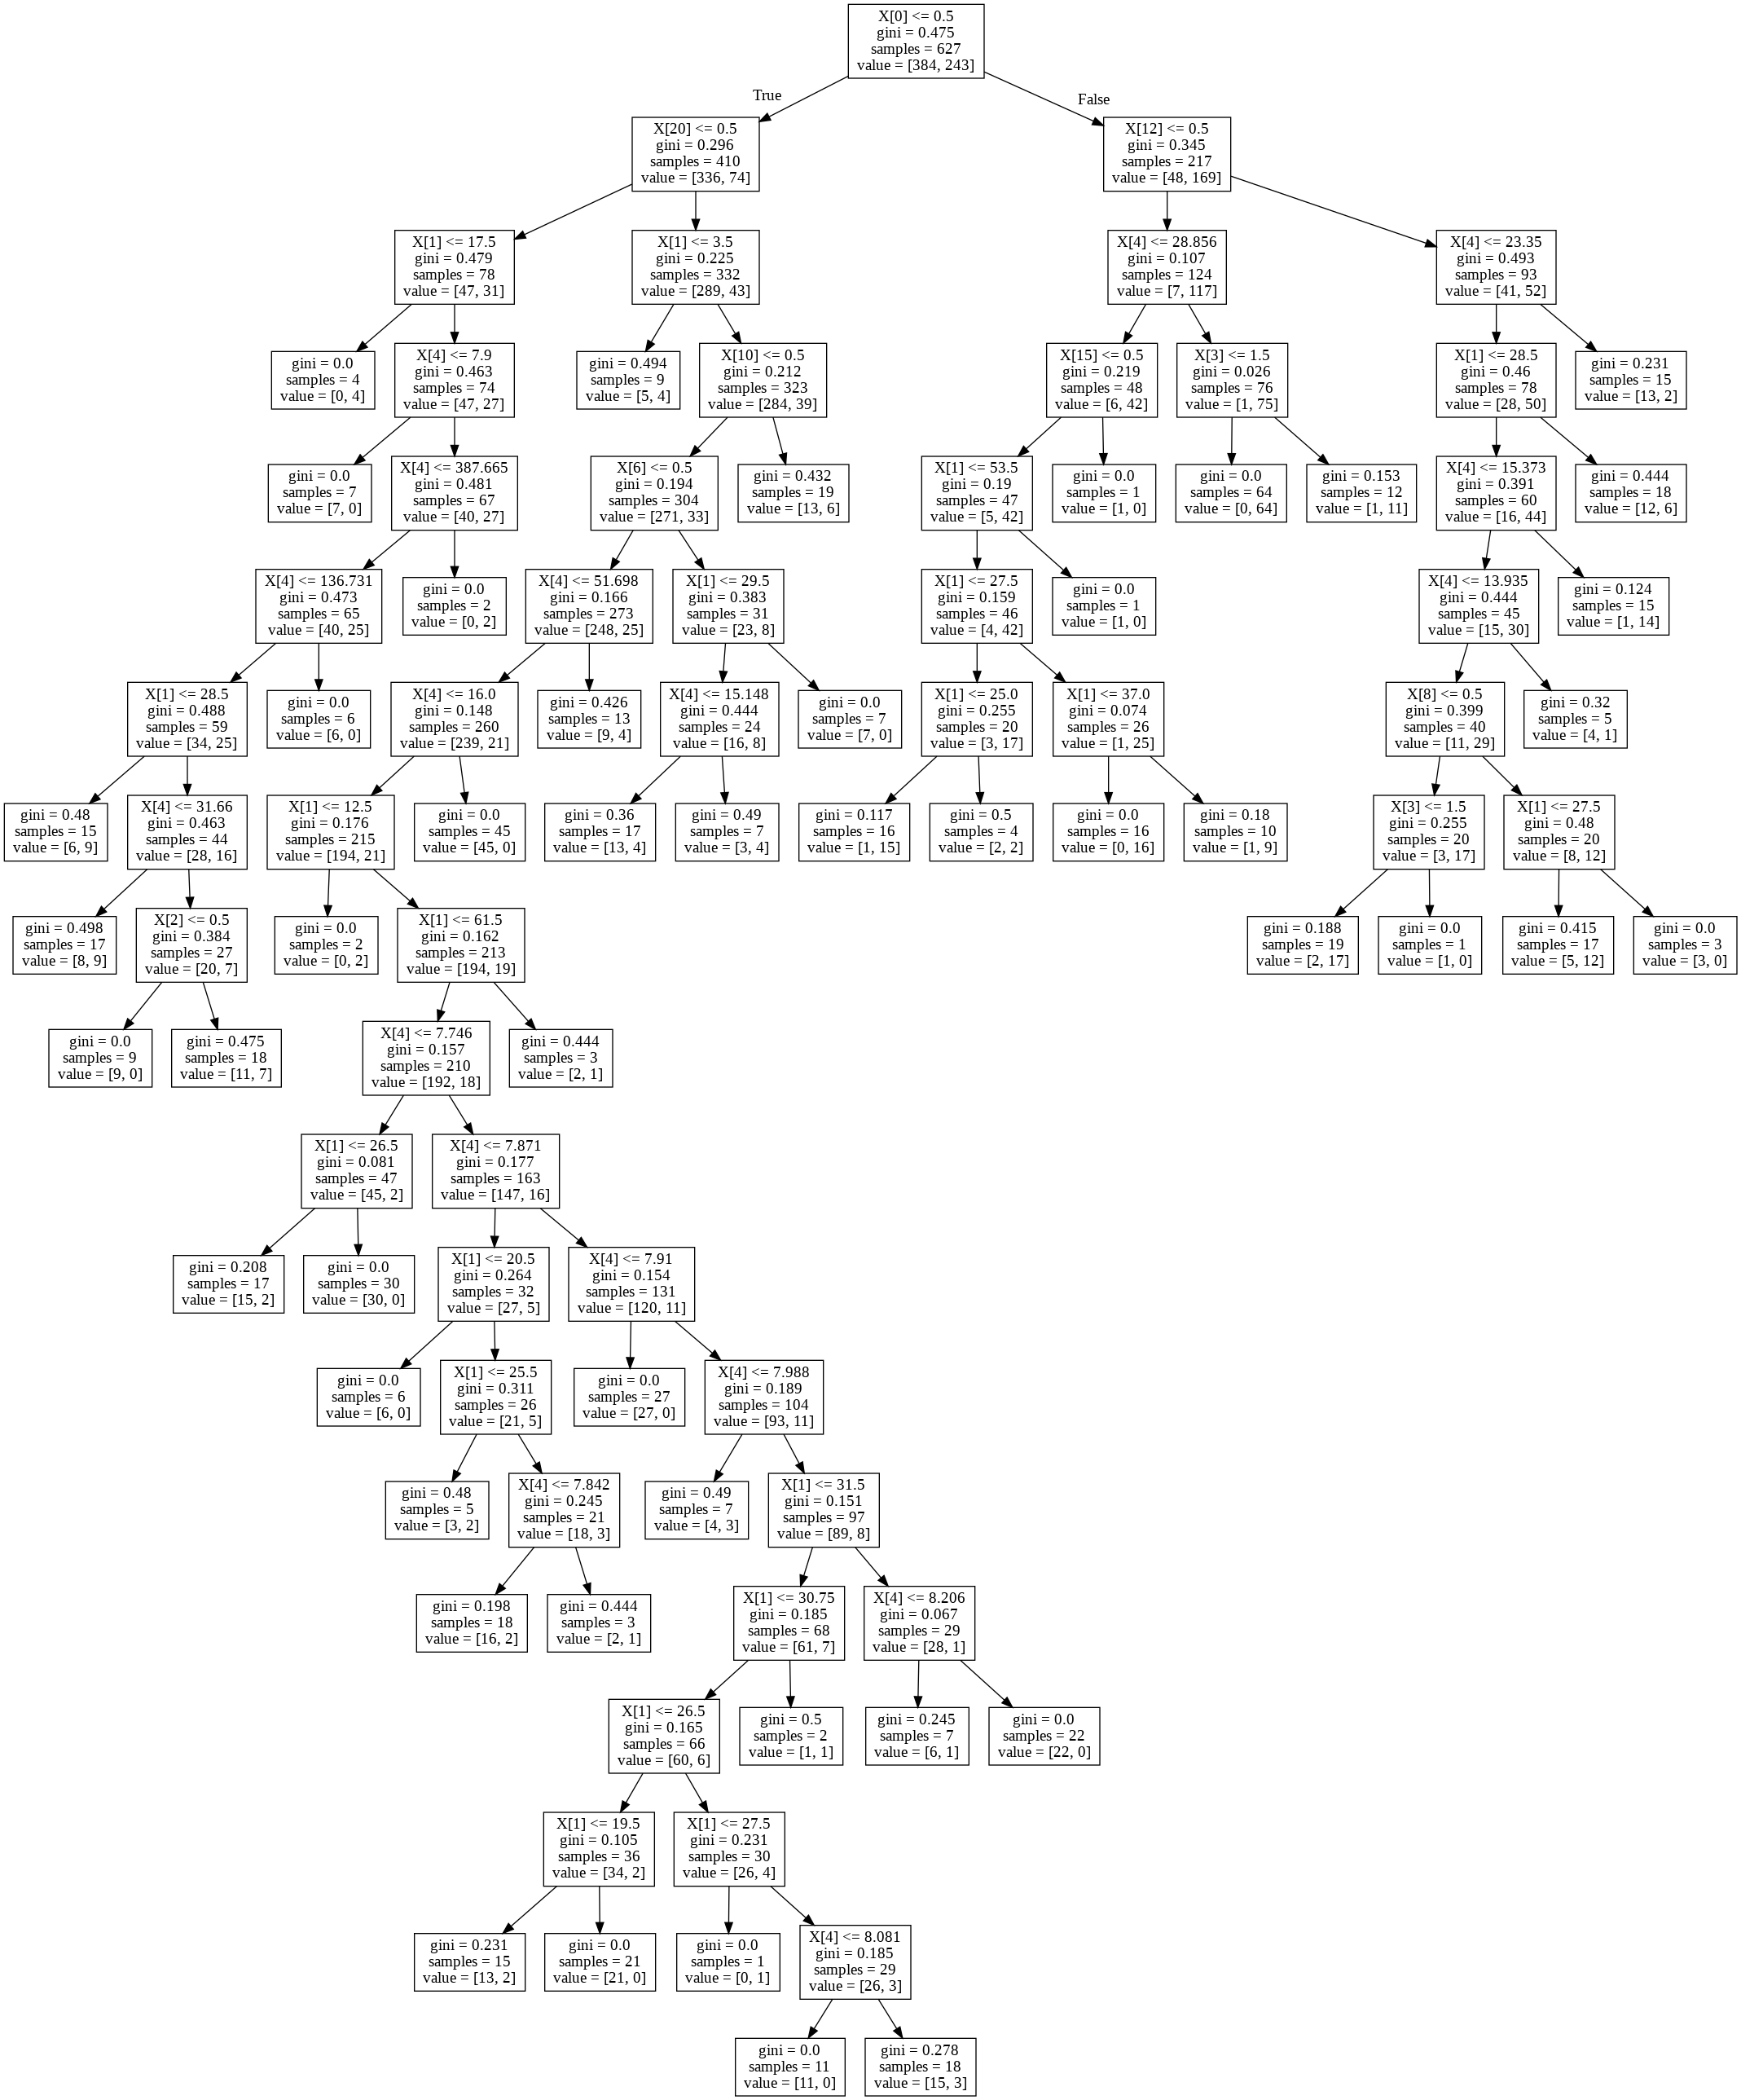

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())